Генерация точек, равномерно распределенных на сфере 

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

N = 100
dim = 3

norm = np.random.normal
normal_deviates = norm(size=(dim, N))

radius = np.sqrt((normal_deviates**2).sum(axis=0))
points = normal_deviates/radius


+ визуализация (если d < 4!)

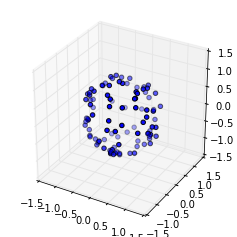

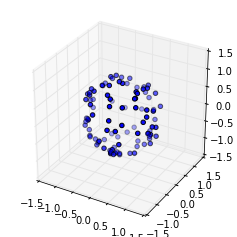

In [9]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.scatter(*points)
ax.set_aspect('equal')
plt.show()

In [10]:
def N_eps(eps, x, points):
    n = 0
    for p in points:
        dist = np.linalg.norm(x-p)
        if dist > 0 and dist <= eps:
            n += 1
    return n

In [11]:
def calc_K(dim):
    return math.gamma((dim+1)*1./2)/(math.gamma((dim)*1./2)*math.sqrt(math.pi))

In [12]:
import math
 
def eps(dim, N, K):
    C = 2*math.pow(K, 1./(dim-1))
    
    return min([C*math.pow(N, -1./(dim-1)), 2])

Зависимость Nε(X) от N при разных p

In [13]:
def get_statistics(N_arrange, dim, X):

    num_of_points = []
    K = calc_K(dim)

    for N in N_arrange:
        print 'N =', N

        num_of_points_experiments = []

        curr_eps = eps(dim, N, K)
        print "epsilon =", curr_eps
        for experiment in range(50):

            norm = np.random.normal
            normal_deviates = norm(size=(dim, N))

            radius = np.sqrt((normal_deviates**2).sum(axis=0))
            points = normal_deviates/radius
            points = points.transpose()

            num_of_points_experiments.append(N_eps(curr_eps, X, points))

        num_of_points.append(num_of_points_experiments)
        
    return num_of_points

dim = 3

In [14]:
dim = 3
X = np.zeros(dim)
X[0] = 1

N_arrange = [10**i/2 for i in range(1,5) ] + [10**i for i in range(1,5)]

num_of_points = get_statistics(N_arrange, dim, X)

N = 5
epsilon = 0.713649646461
N = 50
epsilon = 0.225675833419
N = 500
epsilon = 0.0713649646461
N =N = 5
epsilon = 0.713649646461
N = 50
epsilon = 0.225675833419
N = 500
epsilon = 0.0713649646461
N = 5000
epsilon = 0.0225675833419
N = 5000
epsilon = 0.0225675833419
N = 10
epsilon = 0.504626504404
N = 100
epsilon = 0.159576912161
N = 10
epsilon = 0.504626504404
N = 100
epsilon = 0.159576912161
N = 1000
epsilon = 0.0504626504404
N = 1000
epsilon = 0.0504626504404
N = 10000
epsilon = 0.0159576912161
 10000
epsilon = 0.0159576912161


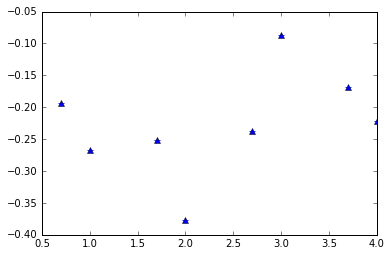

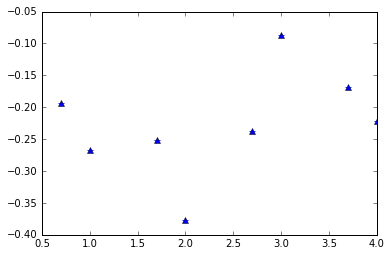

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.log10(N_arrange)
y = np.log10([np.mean(i) for i in num_of_points]) 
e = np.log10([max(np.std(i), 1) for i in num_of_points])
plt.errorbar(x, y, e, linestyle='None', marker='^')

plt.show()

dim = 20

In [16]:
dim = 20
X = np.zeros(dim)
X[0] = 1

N_arrange = [10**i/2 for i in range(3,7) ] + [10**i for i in range(3,7)]

num_of_points = get_statistics(N_arrange, dim, X)

N = 500
epsilon = 1.48568329278
N =N = 500
epsilon = 1.48568329278
N = 5000
epsilon = 1.31611749014
N = 5000
epsilon = 1.31611749014
N = 50000
epsilon = 1.16590477679
N = 50000
epsilon = 1.16590477679
N = 500000
epsilon = 1.03283632254
N = 500000
epsilon = 1.03283632254
N = 1000
epsilon = 1.43246017144
N = 1000
epsilon = 1.43246017144
N = 10000
epsilon = 1.26896889446
N = 10000
epsilon = 1.26896889446
N = 100000
epsilon = 1.12413740167
N = 100000
epsilon = 1.12413740167
N = 1000000
epsilon = 0.995835991995
 1000000
epsilon = 0.995835991995


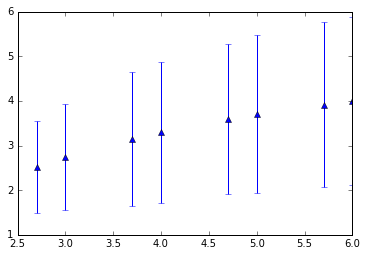

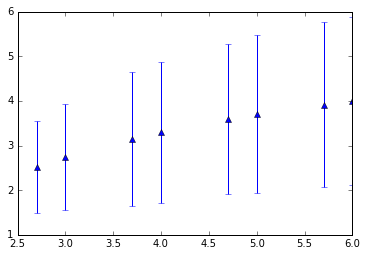

In [17]:
x = np.log10(N_arrange)
y = np.log10([np.mean(i) for i in num_of_points]) 
e = np.log10([max(np.std(i), 1) for i in num_of_points])

plt.errorbar(x, y, e, linestyle='None', marker='^')
#plt.scatter(x, y)
plt.show()

Линейная регрессия.

Можно строить линейную регрессию по средним значениям, так как среднее минимизует сумму квадратов отклонения.

In [18]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[j, 1] for j in np.log10(N_arrange)], np.log10([np.mean(i) for i in num_of_points]))
print reg.coef_

[ 0.43997914  0.        ]
[ 0.43997914  0.        ]


In [19]:
print "Mean squared error: ", np.mean(reg.predict([[j, 1] for j in np.log10(N_arrange)]) - y) ** 2

Mean squared error:  1.23259516441e-32
Mean squared error:  1.23259516441e-32


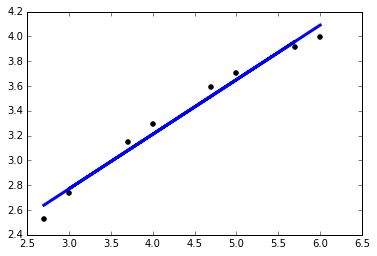

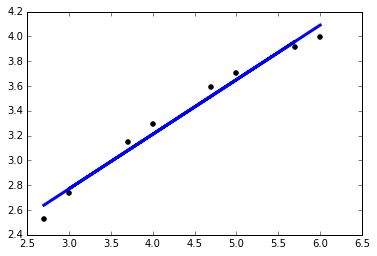

In [ ]:
plt.scatter(x, y,  color='black')
#plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.plot(x, reg.predict([[j, 1] for j in np.log10(N_arrange)]), color='blue',
         linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

dim = 80

In [ ]:
dim = 80
X = np.zeros(dim)
X[0] = 1

N_arrange = [10**i/2 for i in range(3,7) ] + [10**i for i in range(3,7)]

num_of_points = get_statistics(N_arrange, dim, X)

N = 500
epsilon = 1.87863211158
N =N = 500
epsilon = 1.87863211158
N = 5000
epsilon = 1.82466656283
N = 5000
epsilon = 1.82466656283
N = 50000
epsilon = 1.77225122736
N = 50000
epsilon = 1.77225122736
N =

Получаем эпсилон, почти полностью накрывающие шар

In [ ]:
x = np.log10(N_arrange)
y = np.log10([np.mean(i) for i in num_of_points]) 
e = np.log10([max(np.std(i), 1) for i in num_of_points])
plt.errorbar(x, y, e, linestyle='None', marker='^')

plt.show()

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[j, 1] for j in np.log10(N_arrange)], np.log10([np.mean(i) for i in num_of_points]))
print reg.coef_

Зависимость линейная, с коэффициэнтом почти 1, так как эпсилон большое - вмещает в себя почти всю сферу, значит и почти все точки

In [ ]:
plt.scatter(x, y,  color='black')
plt.plot(x, reg.predict([[j, 1] for j in np.log10(N_arrange)]), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()